In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_info = '../archive_googleplaystore/googleplaystore_preprocessed.csv'
path_review = '../archive_googleplaystore/googleplaystore_user_reviews_preprocessed.csv'

In [3]:
df_info=pd.read_csv(path_info)
df_info

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,0.0,Everyone,Education,"July 25, 2017"
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,0.0,Everyone,Education,"July 6, 2018"
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,0.0,Everyone,Medical,"January 20, 2017"
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,0.0,Mature 17+,Books & Reference,"January 19, 2015"


In [4]:
df_review=pd.read_csv(path_review)
df_review=df_review.drop('Unnamed: 0', axis=1)
df_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [5]:
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
from PIL import ImageDraw

# All (Sentiment 불문) Reviews Word Cloud

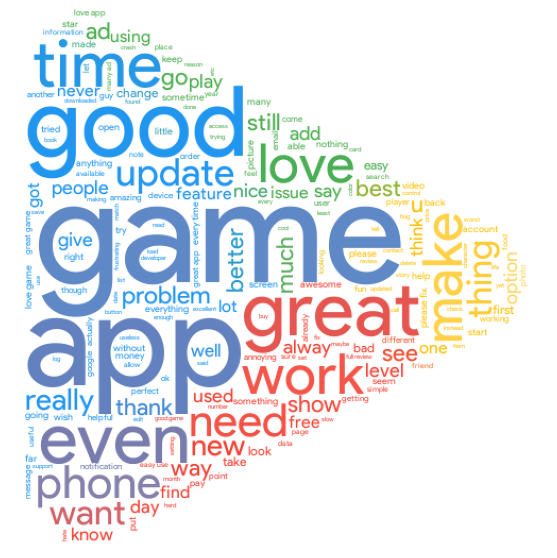

In [7]:
##전체
all_rev=df_review['Translated_Review'].tolist()
all_rev=' '.join(all_rev)

all_text=re.sub("[^a-zA-Z]"," ", all_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
all_text=all_text.lower() #소문자화

all_text=nltk.word_tokenize(all_text)
all_text_filtered=[word for word in all_text if word not in stopwords.words('english')]

lemma=nltk.WordNetLemmatizer()
all_text_lemma=[lemma.lemmatize(i) for i in all_text_filtered]
all_text=[" ".join(all_text_lemma)]


FONT_PATH='/Users/sejeongan/Library/Fonts/Product Sans Regular.ttf'
mask=np.array(Image.open('/Users/sejeongan/Downloads/732208.jpg'))

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color="white",
    width=300,
    height=300,
    font_path=FONT_PATH,
    color_func=ImageColorGenerator(mask),
    mask=mask).generate_from_text(" ".join(all_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Positive Reviews Word Cloud

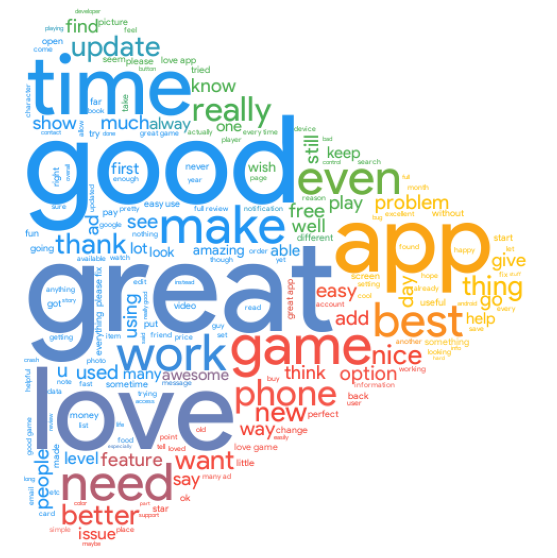

In [9]:
##Positive
positive=df_review[df_review['Sentiment'] == 'Positive']
pos_rev=positive['Translated_Review'].tolist()
pos_rev=' '.join(pos_rev)

pos_text=re.sub("[^a-zA-Z]"," ", pos_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
pos_text=pos_text.lower() #소문자화

pos_text=nltk.word_tokenize(pos_text)
pos_text_filtered=[word for word in pos_text if word not in stopwords.words('english')]

lemma=nltk.WordNetLemmatizer()
pos_text_lemma=[lemma.lemmatize(i) for i in pos_text_filtered]
pos_text=[" ".join(pos_text_lemma)]


FONT_PATH='/Users/sejeongan/Library/Fonts/Product Sans Regular.ttf'
mask=np.array(Image.open('/Users/sejeongan/Downloads/732208.jpg'))

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color="white",
    width=300,
    height=300,
    font_path=FONT_PATH,
    color_func=ImageColorGenerator(mask),
    mask=mask).generate_from_text(" ".join(pos_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Negative Reviews Word Cloud

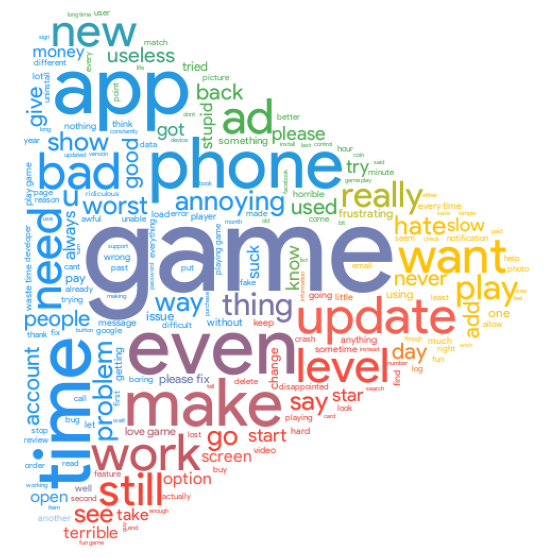

In [10]:
##Negative
negative=df_review[df_review['Sentiment'] == 'Negative']
neg_rev=negative['Translated_Review'].tolist()
neg_rev=' '.join(neg_rev)

neg_text=re.sub("[^a-zA-Z]"," ", neg_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
neg_text=neg_text.lower() #소문자화

neg_text=nltk.word_tokenize(neg_text)
neg_text_filtered=[word for word in neg_text if word not in stopwords.words('english')]

lemma=nltk.WordNetLemmatizer()
neg_text_lemma=[lemma.lemmatize(i) for i in neg_text_filtered]
neg_text=[" ".join(neg_text_lemma)]


FONT_PATH='/Users/sejeongan/Library/Fonts/Product Sans Regular.ttf'
mask=np.array(Image.open('/Users/sejeongan/Downloads/732208.jpg'))

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color="white",
    width=300,
    height=300,
    font_path=FONT_PATH,
    color_func=ImageColorGenerator(mask),
    mask=mask).generate_from_text(" ".join(neg_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Neutral Reviews Word Cloud

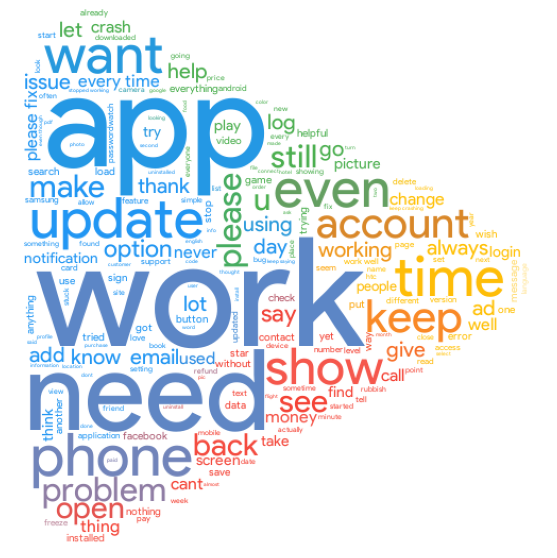

In [11]:
##Neutral
neutral=df_review[df_review['Sentiment'] == 'Neutral']
neu_rev=neutral['Translated_Review'].tolist()
neu_rev=' '.join(neu_rev)

neu_text=re.sub("[^a-zA-Z]"," ", neu_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
neu_text=neu_text.lower() #소문자화

neu_text=nltk.word_tokenize(neu_text)
neu_text_filtered=[word for word in neu_text if word not in stopwords.words('english')]

lemma=nltk.WordNetLemmatizer()
neu_text_lemma=[lemma.lemmatize(i) for i in neu_text_filtered]
neu_text=[" ".join(neu_text_lemma)]


FONT_PATH='/Users/sejeongan/Library/Fonts/Product Sans Regular.ttf'
mask=np.array(Image.open('/Users/sejeongan/Downloads/732208.jpg'))

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color="white",
    width=300,
    height=300,
    font_path=FONT_PATH,
    color_func=ImageColorGenerator(mask),
    mask=mask).generate_from_text(" ".join(neu_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 카테고리별 Word Cloud (모든 카테고리)

In [6]:
review2=df_review.groupby('App').mean()

review_apps=review2.index.tolist()
app_with_reviews=[]
for name in review_apps:
    if name in df_info['App'].unique().tolist():
        app_with_reviews.append(name)
        
drop_lst=[]
for x in range(0,len(df_info)):
    if df_info.App[x] not in app_with_reviews or df_info.App[x] in df_info.App.iloc[:x].values:
        drop_lst.append(x)
appdata2=df_info.drop(index=drop_lst).reset_index(drop=True)


drop_lst2=[]
for x in range(0,len(review2)):
    if review2.index[x] not in app_with_reviews:
        drop_lst2.append(review2.index[x])
review3=review2.drop(index=drop_lst2)
        
data=pd.merge(appdata2,review3, left_on='App', right_on='App')
        
        
df_review_only=df_review.drop(columns=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

df_review_only2=df_review_only.drop(df_review_only[~df_review_only['App'].isin(app_with_reviews)].index)


review_only3=df_review_only2.groupby(['App'], as_index=False).agg({'Translated_Review':' '.join})

lst=[]
for k in review_only3.App:
    for index in range(0,len(data)):
        if data.App[index] == k:
            lst.append(data.Category[index])
s1 = pd.Series(lst)

review_only3['Category']=s1
review_only3=review_only3[['App', 'Category', 'Translated_Review']]

ART_AND_DESIGN


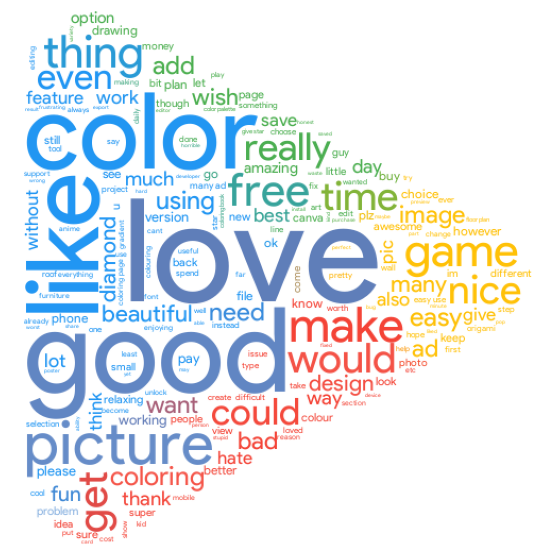

AUTO_AND_VEHICLES


AttributeError: 'list' object has no attribute 'words'

In [7]:
cat_dct = {}
for cat in df_info.Category.unique().tolist():

    print(cat)
    category_reviews=review_only3[review_only3['Category']==cat]
    cat_rev=category_reviews['Translated_Review'].tolist()
    cat_rev=' '.join(cat_rev)


    cat_text=re.sub("[^a-zA-Z]"," ", cat_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
    cat_text=cat_text.lower() #소문자화

    cat_text=nltk.word_tokenize(cat_text)
    cat_text_filtered=[word for word in cat_text if word not in stopwords.words('english')]
    
    lemma=nltk.WordNetLemmatizer()
    cat_text_lemma=[lemma.lemmatize(i) for i in cat_text_filtered]
    cat_text=[" ".join(cat_text_lemma)]

    stopwords=['app','great']
    
    FONT_PATH='/Users/sejeongan/Library/Fonts/Product Sans Regular.ttf'
    mask=np.array(Image.open('/Users/sejeongan/Downloads/732208.jpg'))
    
    plt.subplots(figsize=(10,10))
    wordcloud=WordCloud(
        background_color="white",
        width=300,
        height=300,
        stopwords=stopwords,
        font_path=FONT_PATH,
        color_func=ImageColorGenerator(mask),
        mask=mask).generate_from_text(" ".join(cat_text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

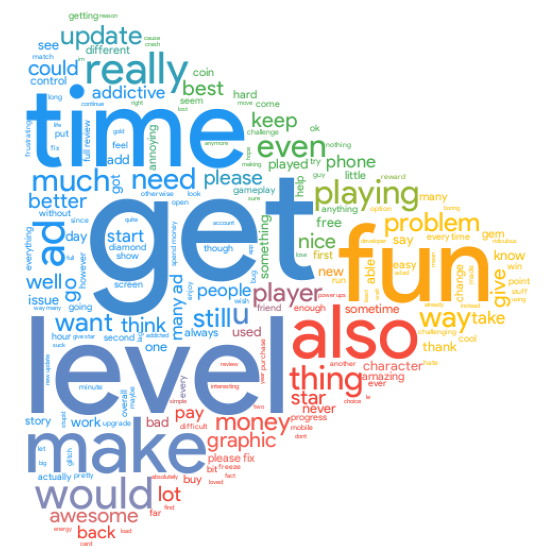

In [7]:
game=review_only3[review_only3['Category'] == 'GAME']
game_rev=game['Translated_Review'].tolist()
game_rev=' '.join(game_rev)

game_text=re.sub("[^a-zA-Z]"," ", game_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
game_text=game_text.lower() #소문자화

game_text=nltk.word_tokenize(game_text)
game_text_filtered=[word for word in game_text if word not in stopwords.words('english')]

lemma=nltk.WordNetLemmatizer()
game_text_lemma=[lemma.lemmatize(i) for i in game_text_filtered]
game_text=[" ".join(game_text_lemma)]


FONT_PATH='/Users/sejeongan/Library/Fonts/Product Sans Regular.ttf'
mask=np.array(Image.open('/Users/sejeongan/Downloads/732208.jpg'))

stopwords=['game','love','like','great','good','play']

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color="white",
    width=300,
    height=300,
    stopwords=stopwords,
    font_path=FONT_PATH,
    color_func=ImageColorGenerator(mask),
    mask=mask).generate_from_text(" ".join(game_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

AttributeError: 'list' object has no attribute 'words'